In [13]:
import numpy as np
import pandas as pd
from grn_learn.viz import set_plotting_style
import seaborn as sns 
import matplotlib.pyplot as plt 


from grn_learn import download_and_preprocess_data
from grn_learn import annot_data_trn
from grn_learn import train_keras_multilabel_nn
from sklearn.model_selection import StratifiedKFold

from keras.backend import clear_session
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
from keras.utils import np_utils
from keras.metrics import categorical_accuracy
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from keras.layers import Dropout
import keras.backend as K
from keras import regularizers

from sklearn.model_selection import train_test_split

seed = 42 
np.random.seed(seed)

set_plotting_style()

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

### Download, preprocess data for *P. aeru*

In [ ]:
org = 'paeru'

g.download_and_preprocess_data('paeru',
                               data_dir = 'colombos_'+ org + '_exprdata_20151029.txt')

### Annotate dataset using the TRN from the Martinez-Antonio lab

In [ ]:
# paeru 
paeru_path = '~/Documents/uni/bioinfo/data/paeru/'

g.annot_data_trn(tf_tf_net_path = paeru_path + 'paeru_tf_tf_net.csv',
                 trn_path = paeru_path + 'paeru-trn.csv',
                 denoised_data_path= '~/Downloads/',
                 org = 'paeru', 
                 output_path = '~/Downloads/')

#df_trn = pd.read_csv(path + 'paeru-trn.csv',  comment= '#')

#tfs = pd.read_csv(path+'paeru_tfs.csv')

# tf_tf_df = get_gene_data(df_trn, 'Target gene', tf_list)

In [14]:
denoised = pd.read_csv('~/Downloads/denoised_hot_paeru.csv')

denoised.head()

regulons_p = denoised[denoised['TG'] == 1]

non_regulons_p = denoised[denoised['TG'] == 0]

noise = non_regulons_p.sample(n = 50, replace = False)

regulons_with_noise_p = pd.concat([regulons_p, noise], axis = 0)

non_regulons_wo_noise = non_regulons_p.drop(noise.index.to_list())


#annot = regulons_with_noise.iloc[:, :3]



In [15]:
data_p = regulons_with_noise_p.iloc[:, 3:-13]

target_p = regulons_with_noise_p.iloc[:, -13:-1]

In [7]:
target_p.head()

,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5,cluster 6,cluster 7,cluster 8,cluster 9,cluster 10,cluster 11,cluster 12
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
val_shape = int(data.shape[0] * 0.15)
X_train, X_test, y_train, y_test = train_test_split(data,
                                                    target,
                                                    shuffle = True,
                                                    test_size=0.2,
                                                    random_state= seed) 

x_val = X_train[:val_shape]
partial_x_train = X_train[val_shape:]
y_val = y_train[:val_shape]
partial_y_train = y_train[val_shape:]

### Run keras net on paeru dataset

In [27]:
nn, history = g.train_keras_multilabel_nn(X_train,
                                          y_train, 
                                          partial_x_train,
                                          partial_y_train, 
                                          x_val, 
                                          y_val,
                                          n_units=64,
                                        epochs=20,
                                        n_deep_layers=3,
                                        batch_size=128)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 64)                35840     
_________________________________________________________________
dense_12 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)               

In [28]:
score, accuracy = nn.evaluate(
    X_test,
    y_test, 
    batch_size=64, 
    verbose=2
)

accuracy

0.9397690296173096

### B. subti data download

In [3]:
# bsubti 
bsubt_path = '~/Documents/uni/bioinfo/data/bsubti/'

In [16]:
g.download_and_preprocess_data('bsubt')
#                                data_dir = 'colombos_'+ org + '_exprdata_20151029.txt')

### B. subti annotate dataset using TRN from the Merino Lab

In [4]:
g.annot_data_trn(tf_tf_net_path = bsubt_path + 'bsub-tf-net.csv',
                 trn_path = bsubt_path + 'bsubt_trn-l.txt',
                 denoised_data_path= '~/Downloads/',
                 org = 'bsubt', 
                 output_path = '~/Downloads/')

In [16]:
denoised_b = pd.read_csv('~/Downloads/denoised_hot_bsubt.csv')

In [17]:
#denoised.head()

regulons_b = denoised_b[denoised_b['TG'] == 1]

non_regulons_b = denoised_b[denoised_b['TG'] == 0]

noise = non_regulons_b.sample(n = 50, replace = False)

regulons_with_noise_b = pd.concat([regulons_b, noise], axis = 0)

non_regulons_wo_noise = non_regulons_b.drop(noise.index.to_list())

#annot = regulons_with_noise.iloc[:, :3]



In [18]:
data_b = regulons_with_noise_b.iloc[:, 3:-7]

target_b = regulons_with_noise_b.iloc[:, -7:-1]

In [7]:
data_b[:5, -1]


array([-0.01780943, -0.05395231,  0.08016633, -1.36468878,  0.10734831])

In [17]:
val_shape = int(data.shape[0] * 0.15)
X_train, X_test, y_train, y_test = train_test_split(data,
                                                    target,
                                                    shuffle = True,
                                                    test_size=0.2,
                                                    random_state= seed) 

x_val = X_train[:val_shape]
partial_x_train = X_train[val_shape:]
y_val = y_train[:val_shape]
partial_y_train = y_train[val_shape:]

In [18]:
nn, history = g.train_keras_multilabel_nn(X_train,
                                          y_train, 
                                          partial_x_train,
                                          partial_y_train, 
                                          x_val, 
                                          y_val,
                                          n_units=64,
                                          epochs=20,
                                          n_deep_layers=3,
                                          batch_size=128)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                80640     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)               

In [20]:
history.head()

,val_loss,val_accuracy,loss,accuracy
0,0.433546,0.907407,0.592494,0.853968
1,0.395748,0.925926,0.488182,0.885714
2,0.376174,0.937500,0.454035,0.901587
3,0.356374,0.939815,0.414920,0.916402
4,0.347610,0.932870,0.388302,0.921164


In [19]:
score, accuracy = nn.evaluate(
    X_test,
    y_test, 
    batch_size=64, 
    verbose=2
)

accuracy

0.9398624897003174

## Upload coli data 

In [19]:
denoised = pd.read_csv('~/Downloads/denoised_hot_coli.csv')

In [20]:
regulons_e = denoised[denoised['TG'] == 1]

non_regulons_e = denoised[denoised['TG'] == 0]

noise = non_regulons_e.sample(n = 50, replace = False)

regulons_with_noise_e = pd.concat([regulons_e, noise], axis = 0)

non_regulons_wo_noise = non_regulons_e.drop(noise.index.to_list())


#annot = regulons_with_noise.iloc[:, :3]



In [21]:
data_e = regulons_with_noise_e.iloc[:, 3:-10]

target_e = regulons_with_noise_e.iloc[:, -10:-1]


### Set up simulations for E. coli, B. subti, and P. aeru

In [22]:
organisms = ['ecoli', 'bsubti', 'paeru']

datasets = [(data_e, target_e), (data_b, target_b), (data_p, target_p)]

kfold = KFold(n_splits = 5, shuffle= True, random_state=seed)

cross_val_df = pd.DataFrame()

# Iterate over organisms
for ix in range(3):
    
    # 
    org = organisms[ix]
    data = datasets[ix]
    
    #Extract datasets
    X = data[0]
    y = data[1]
    
    # Iterate over folds
    for train, test in kfold.split(data[0], data[1]):
        
        # Train test split
        X_train = X.iloc[train, :]
        y_train = y.iloc[train, :]
        X_test = X.iloc[test, :]
        y_test = y.iloc[test, :]
        #print(type(X_train))
        
        # Run neural net
        nn = Sequential()
    
        #initial layer
        nn.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
    
        #extra deep layers
        for i in range(2):
            nn.add(Dense(64, activation='relu',
                         kernel_regularizer=regularizers.l2(0.001))
                   )
            nn.add(Dropout(0.25))
        
        #add final output layer
        nn.add(Dense(y_train.shape[1], activation='softmax'))
        nn.compile(optimizer='rmsprop',
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])
    
        #print neural net architecture
        nn.summary()

        #fit and load history
        
        history = nn.fit(X_train, y_train, epochs=20,
                    batch_size= 128,
                    verbose = 0)
        
        # Compute accuracy
        score, acc = nn.evaluate(X_test, y_test)
        
        # Store acc in dataframe
        sub_df = pd.DataFrame({'accuracy': [acc],
                              'organism': [org]})
        
        cross_val_df = pd.concat([cross_val_df, sub_df])
        

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               521984    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 9)                 585       
Total params: 534,985
Trainable params: 534,985
Non-trainable params: 0
________________________________________________

97/97 [==============================] - 1s 11ms/step
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 128)               161280    
_________________________________________________________________
dense_30 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_15 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_16 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 6)                 390       
Total params: 174,086
Trainable params: 174,086
Non-trainable para

100/100 [==============================] - 0s 4ms/step
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 128)               71680     
_________________________________________________________________
dense_58 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_29 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_59 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_30 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_60 (Dense)             (None, 12)                780       
Total params: 84,876
Trainable params: 84,876
Non-trainable para

In [31]:
#cross_val_df.to_csv('../../data/cv_data.csv', index = False)

In [2]:
#cross_val_df = pd.read_csv('../../data/cv_data.csv')

In [35]:
sns.boxplot?

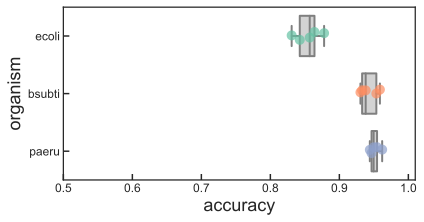

In [45]:
plt.figure(figsize = (6, 3.2)) 

sns.boxplot(data = cross_val_df, 
              y = 'organism', 
              x = 'accuracy',
              color = 'lightgray',
              saturation = 1,
              whis = 1,
              width = 0.7
              #alpha = 0.5
              )

sns.stripplot(data = cross_val_df, 
              y = 'organism', 
              x = 'accuracy',
              palette = 'Set2',
              #edgecolor = 'gray',
              #linewidth = 0.4,
              size = 10,
              alpha = 0.7)

plt.tight_layout()
plt.xlim(0.5, 1.01)

plt.savefig('cross_val_org.pdf', dpi = 600)